In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.io import fits
import os

3BS J224712.25+461815.0 17.945310592651367 17.851099014282227 17.701671600341797 0.04431947673748925 0.04304122627131358
3BS J224712.25+461815.0 18.197288513183594 18.365768432617188 18.088830947875977 0.06943873308938568 0.06622595397334313
3BS J224712.25+461815.0 99.0 18.91229248046875 17.986764907836914 99.0 0.12563500217787646


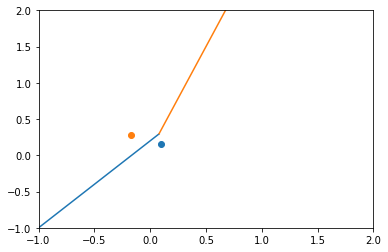

In [2]:
file_col = 'e:\\Observations\\MMPP\\photometry2020_10_1317\\MLS180917_224712+461815_color.fits'
file_pho = 'e:\\Observations\\MMPP\\photometry2020_10_1317\\MLS180917_224712+461815_lightcurve.fits'
star_coord = [341.8009700,46.3041900]#[4.8686400,48.6517800]#[311.22949432000, -16.37944613590]##[341.8009700,46.3041900]# 
hdul_col = fits.open(file_col)
hdul_pho = fits.open(file_pho)
colors = hdul_col[1].data
coord = np.array((colors.RA,colors.DEC))
tol = 1
tol2 = tol*tol/3600.0/3600.0 # radius in square
r2 = (coord[0,:] - star_coord[0])**2 + (coord[1,:] - star_coord[1])**2
i = r2 <= tol2
x1=np.array([-1,0.08])
y1=1.2*x1+0.2
x2=np.array([0.08,5])
plt.plot(x1,y1)
plt.plot(x2,2.86*x2+0.07)
plt.xlim(-1,2)
plt.ylim(-1,2)
for j in range(3):
    colors = hdul_col[j+1].data
    print(colors[i][0][0],colors[i][0][5],colors[i][0][9],colors[i][0][13],colors[i][0][18],colors[i][0][22])
    plt.scatter(colors[i][0][17],colors[i][0][21])


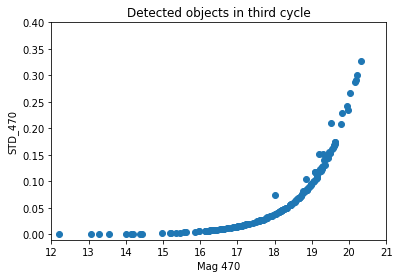

In [3]:
plt.scatter(colors.MAG_STD_470_PSF,colors.MAGERR_STD_470_PSF)
plt.xlim(12,21)
plt.ylim(-.01,0.4)
plt.xlabel('Mag 470')
plt.ylabel('STD_470')
plt.title('Detected objects in third cycle')
plt.savefig('e:\Observations\MMPP\photometry2020_10_1317\limit.pdf')

[17.95374606 18.18759193         nan]
[18.06617895 18.37163169 18.56289981]
[17.85306727 18.02859545 17.94612341]
[-0.11243289 -0.18403975         nan]
[0.21311168 0.34303624 0.6167764 ]


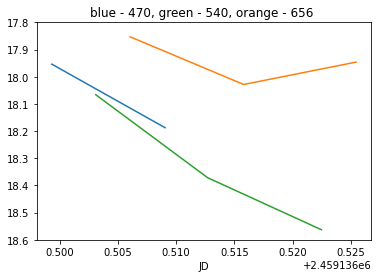

In [5]:
phot = hdul_pho[1].data
JD = hdul_pho[2].data
plt.plot(JD.JD_470,phot[i][0][7])
plt.plot(JD.JD_656,phot[i][0][23])
plt.plot(JD.JD_540,phot[i][0][15])
plt.title('blue - 470, green - 540, orange - 656 ')
plt.ylim(18.6,17.8)
plt.xlabel('JD')
plt.savefig('e:\Observations\MMPP\photometry2020_10_1317\lc.pdf')
print(phot[i][0][7])
print(phot[i][0][15])
print(phot[i][0][23])

print(phot[i][0][7]-phot[i][0][15])
print(phot[i][0][15]-phot[i][0][23])

In [158]:
stars = pd.read_fwf('e:\Observations\MMPP\stellar_colors_470-540-656.dat')


(-1.0, 1.0)

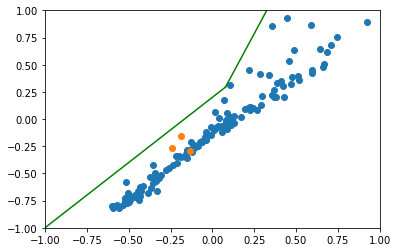

In [163]:
mag = np.array(phot.MAG_STD_540_PSF_CORR)
k = np.nan_to_num(mag, nan=99.) <= 20
#plt.scatter(phot.MAG_STD_470_PSF_CORR[k]-phot.MAG_STD_540_PSF_CORR[k],phot.MAG_STD_540_PSF_CORR[k]-phot.MAG_STD_656_PSF_CORR[k])
plt.scatter(stars.iloc[0:,1],stars.iloc[0:,2])
plt.scatter(phot[i][0][7]-phot[i][0][15],phot[i][0][15]-phot[i][0][23])
plt.plot(x1,y1,color='green')
plt.plot(x2,2.86*x2+0.07,color='green')
plt.xlim(-1,1)
plt.ylim(-1,1)

20.004144958380994


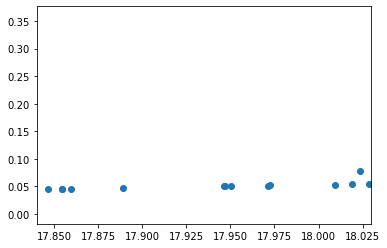

In [10]:
q=2
plt.scatter(phot.MAG_STD_656_PSF_CORR[:,q],phot.MAGERR_STD_656_PSF_CORR[:,q])
plt.xlim(17.84,18.03)
print(np.max(np.nan_to_num(phot.MAG_STD_656_PSF_CORR[:,q],nan = 0)))
